# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №4 - Метод k-средних, предобработка признаков


###### <hr\>
**Общая информация**

**Срок сдачи:** 28 ноября 2018, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 28 ноября, -4 балла после 06:00 5 декабря, -6 баллов после 06:00 12 декабря, -8 баллов после 19 декабря

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush
Дополнительно нужно просто скинуть ссылку в slack в личный чат

Используйте данный Ipython Notebook при оформлении домашнего задания.

# Имплементация K-means

Пользуясь наработками выше, имплементируйте метод k-means.  
При инициализации необходимо задавать количество кластеров, функцию расстояния между кластерами (для оригинального k-means - евклидово расстояние) и начальное состояние генератора случайных чисел.

После обучения, среди атрибутов класса `Kmeans` должны появится
* Метки кластеров для объектов
* Координаты центройдов кластеров

k-means - это алгоритм **кластеризации**, а не классификации, а посему метод `.predict()` в нем фактически не нужен, но он может возвращать метки ближайшего кластера для объектов.

###### Задание 1 (2 баллов)
Имплементируйте метод k-means. Задание считается выполненным, если Ваша реализация работает быстрее реализации из sklearn.

Теория для выполнения задания 2 и 3 остаётся на самостоятельное изучение. Теории немного и она совсем простая.

###### Задание 2 (2 балла)
Имплементируйте класс MiniBatchKMeans, который является классом наследником Kmeans.

###### Задание 3 (2 балла)
Превратите k-means в k-means++. Для этого нужно реализовать метод в классе Kmeans, который будет инициализировать более "хорошие" значения центроидов. Чтобы использовался метод k-means++, в параметр init необходимо передать строковое значение 'k-means' (по умолчанию 'random').

###### Задание 4 (2 балла)
В пункте "Проверка корректности метода" нужно нарисовать графики, которые показывают зависимость времени выполнения алгоритма от количества сэмплов. Графики должны быть  нарисованы для различных комбинаций реализаций алгоритма (k-means, k-means++, k-means с MiniBatchKMeans, k-means++ с MiniBatchKMeans). График достаточно построить на 5-10 точках.

###### Задание 5 (2 балла)
В пункте "Применение K-means на реальных данных" нужно сравнить различные реализации k-means (k-means, k-means++, k-means с MiniBatchKMeans, k-means++ с MiniBatchKMeans). После чего написать вывод, в котором должно быть объяснение того, почему один алгоритм оказался лучше остальных или почему не было выявлено лучшего алгоритма.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw4.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст. В противном случае -1 балл
<hr\>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)


# %load_ext pycodestyle_magic

In [3]:
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [4]:
# %%pycodestyle

class MyKmeans: 
    
    def __init__(self, k=2, metric='euclidean', max_iter=1000, random_state=None, init='random', eps=1e-3):
        """
        Инициализация метода
        :k - количество кластеров
        :metric - функция расстояния между объектами
        :max_iter - максиальное количество итераций
        :random_state - seed для инициализации генератора случайных чисел
        """

        self.k = k
        self.random_state = random_state
        self.metric = metric
        self.max_iter = max_iter
        self.init = init
        self.eps = eps # точность нахождения центроидов

        
    def _k_meanspp_init_centrs(self, X):
        centroid_idx = np.random.choice(X.shape[0], size=1, replace=False)[0]
        self.centroids = X[centroid_idx][np.newaxis, :]
        for cur_centr_ind in range(1, self.k):
            dists = pairwise_distances(X, self.centroids, metric='euclidean').min(axis=1)
            weights = dists / dists.sum()
            centroid_idx = np.random.choice(X.shape[0], size=1, replace=False, p=weights)[0]
            self.centroids = np.r_[self.centroids, X[centroid_idx, np.newaxis]]

        
    def fit(self, X, y=None):
        """
        Процедура обучения k-means
        """
        
        # Инициализация генератора случайных чисел
        np.random.seed(self.random_state)
        
        # Массив с метками кластеров для каждого объекта из X
        self.labels = np.empty(X.shape[0])
        
        # Массив с центройдами кластеров
        self.centroids = np.empty((self.k, X.shape[1]))
        
        ## Your Code Here
        if self.init == 'random':
            self.centroids = np.random.rand(self.k, X.shape[1])
        elif self.init == 'k-means':
            self._k_meanspp_init_centrs(X)
            
        for cur_num_iter in range(self.max_iter):
            
            dists = pairwise_distances(X, self.centroids, self.metric)
            self.labels = np.argmin(dists, axis=1)
            shifts = []
            
            for cur_centr_ind in range(self.k):
                centr_objs = X[self.labels == cur_centr_ind]
                if centr_objs.shape[0] > 0:
                    new_value = centr_objs.mean(axis=0)
                    shifts.append(np.linalg.norm(self.centroids[cur_centr_ind] - \
                                                new_value))
                    self.centroids[cur_centr_ind] = new_value
            if max(shifts) < self.eps:
                break
                
        return self

    def predict(self, X, y=None):
        """
        Процедура предсказания кластера
        
        Возвращает метку ближайшего кластера для каждого объекта
        """
        dists = pairwise_distances(X, self.centroids, self.metric)
        return np.argmin(dists, axis=1)

    def _batch_generator(self, X, batch_size=1):
        n = X.shape[0]
        indices = np.arange(n)
        
        while True:
            np.random.shuffle(indices)
            for i in range(0, n, batch_size):
                batch_ind = indices[i: min(i + batch_size, n)]
                yield X[batch_ind]

    
class MiniBatchKMeans(MyKmeans):
    def __init__(self, k=2, metric='euclidean',
                 max_iter=1000, random_state=None,
                 init='random', eps=1e-3, batch_size=10):
        
        super().__init__(k, metric, max_iter, random_state, init, eps)
        self.batch_size = batch_size
    
    def fit(self, X, y=None):
        # Инициализация генератора случайных чисел
        np.random.seed(self.random_state)
        
        # Массив с метками кластеров для каждого объекта из X
        self.labels = np.empty(X.shape[0])
        
        # Массив с центройдами кластеров
        self.centroids = np.empty((self.k, X.shape[1]))
        
        ## Your Code Here
        if self.init == 'random':
            self.centroids = np.random.rand(self.k, X.shape[1])
        elif self.init == 'k-means':
            self._k_meanspp_init_centrs(X)
        
        g_batch = self._batch_generator(X, self.batch_size)
        
        for cur_num_iter in range(self.max_iter):
            X_batch = next(g_batch)
            
            dists = pairwise_distances(X_batch, self.centroids, self.metric)
            self.labels = np.argmin(dists, axis=1)
            
            for cur_centr_ind in range(self.k):
                centr_objs = X_batch[self.labels == cur_centr_ind]
                if centr_objs.shape[0] > 0:
                    new_value = centr_objs.mean(axis=0)
                    self.centroids[cur_centr_ind] = new_value

                
        return self

### Проверка корректности метода

Перед тем как применять алгоритм на реальных данных, нужно испытать его на простых "игрушечных" данных.

Если алгоритм реализован правильно, то метод должен идеально разбивать на 3 кластера данные ниже. Проверьте это.

ВНИМАНИЕ! Проверка должна быть осуществлена на всех реализациях, иначе реализация не будет зачтена!

In [5]:
from sklearn.datasets import make_blobs

In [6]:
X, y = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1, 
           center_box=(-10.0, 10.0), shuffle=False, random_state=1234)

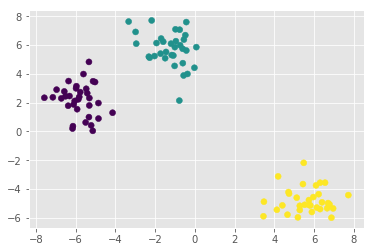

In [7]:
plt.scatter(X[:,0], X[:, 1], c=y)

Проверьте Вашу имплементацию на простых данных (без этого пункта ДЗ не считается выполненным).   
КОММЕНТАРИИ НЕ СТИРАТЬ!

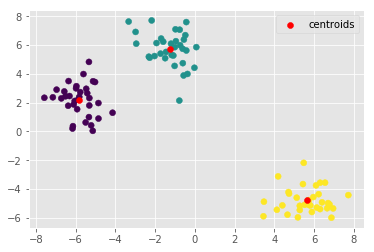

In [10]:
## Работоспособность MyKmeans

kmm = MyKmeans(k=3)
kmm.fit(X)

pred_labels = kmm.predict(X)

plt.scatter(X[:,0], X[:, 1], c=pred_labels)
plt.scatter(kmm.centroids[:, 0], kmm.centroids[:, 1], c='red', label='centroids')
plt.legend()

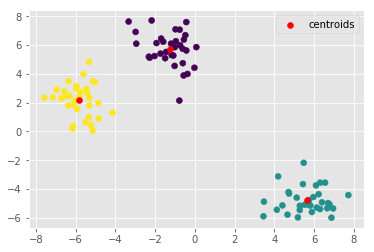

In [11]:
## Работоспособность MyKmeans++

kmpp = MyKmeans(k=3, init='k-means')
kmpp.fit(X)

pred_labels = kmpp.predict(X)

plt.scatter(X[:,0], X[:, 1], c=pred_labels)
plt.scatter(kmpp.centroids[:, 0], kmpp.centroids[:, 1], c='red', label='centroids')
plt.legend()

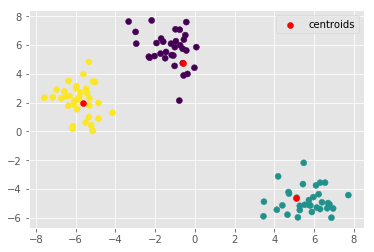

In [12]:
## Работоспособность MyKmeans с MiniBatchMyKmeans
kmmb = MiniBatchKMeans(k = 3, batch_size=10)
kmmb.fit(X)

pred_labels = kmmb.predict(X)

plt.scatter(X[:,0], X[:, 1], c=pred_labels)
plt.scatter(kmmb.centroids[:, 0], kmmb.centroids[:, 1], c='red', label='centroids')
plt.legend()

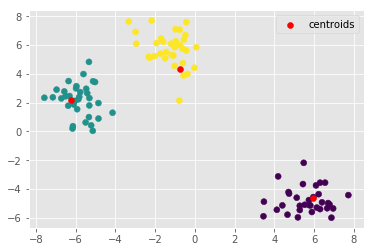

In [15]:
## Работоспособность MyKmeans++ с MiniBatchMyKmeans
km_mb_pp = MiniBatchKMeans(k = 3, batch_size=15, init='k-means')
km_mb_pp.fit(X)

pred_labels = km_mb_pp.predict(X)

plt.scatter(X[:,0], X[:, 1], c=pred_labels)
plt.scatter(km_mb_pp.centroids[:, 0], km_mb_pp.centroids[:, 1], c='red', label='centroids')
plt.legend()

In [21]:
%%time
## Время выполнения алгоритма Kmeans из sklearn
km1 = KMeans(n_clusters=3, max_iter=1000, tol=0)
km1.fit_predict(X)

CPU times: user 5.8 s, sys: 4.28 ms, total: 5.8 s
Wall time: 5.92 s


In [22]:
%%time
## Время выполнения алгоритма MyKmeans
km2 = MyKmeans(k=3, max_iter=1000, eps=0)
km2.fit(X)
km2.predict(X)

CPU times: user 762 ms, sys: 6.41 ms, total: 768 ms
Wall time: 790 ms


In [23]:
%%time
## Время выполнения алгоритма MyKmeans++
km3 = MyKmeans(k=3, max_iter=1000, eps=0, init='k-means')
km3.fit(X)
km3.predict(X)

CPU times: user 749 ms, sys: 6.74 ms, total: 756 ms
Wall time: 775 ms


In [24]:
%%time
## Время выполнения алгоритма MyKmeans с MiniBatchMyKmeans
km4 = MiniBatchKMeans(k=3, max_iter=1000, batch_size=10)
km4.fit(X)
km4.predict(X)

CPU times: user 610 ms, sys: 3.85 ms, total: 614 ms
Wall time: 621 ms


In [25]:
%%time
## Время выполнения алгоритма  MyKmeans++ с MiniBatchMyKmeans
km5 = MiniBatchKMeans(k=3, max_iter=1000, init='k-means', batch_size=10)
km5.fit(X)
km5.predict(X)

CPU times: user 617 ms, sys: 1.85 ms, total: 619 ms
Wall time: 635 ms


In [27]:
import time

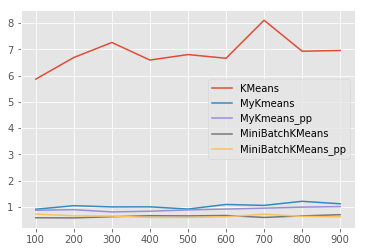

In [30]:
kms = [KMeans(n_clusters=3, max_iter=1000, tol=0),
      MyKmeans(k=3, max_iter=1000, eps=0),
      MyKmeans(k=3, max_iter=1000, eps=0, init='k-means'),
      MiniBatchKMeans(k=3, max_iter=1000, batch_size=10),
      MiniBatchKMeans(k=3, max_iter=1000, init='k-means', batch_size=10)]
kms_label = ['KMeans',
            'MyKmeans',
            'MyKmeans_pp',
            'MiniBatchKMeans',
            'MiniBatchKMeans_pp']

x_nums_sample = list(range(100, 1000, 100))
y_time = [0] * len(x_num_smaple)
X_datas = []

for num_sample in x_nums_sample:
    X, _ = make_blobs(n_samples=num_sample, n_features=2, centers=3, cluster_std=1, 
           center_box=(-10.0, 10.0), shuffle=False, random_state=1234)
    X_datas.append(X)

for i in range(len(kms)):
    for j in range(len(x_nums_sample)):
        start_time = time.time()
        kms[i].fit(X_datas[j])
        kms[i].predict(X_datas[j])
        y_time[j] = time.time() - start_time
    plt.plot(x_nums_sample, y_time, label=kms_label[i])
    
plt.legend()
plt.show()

# Применение K-means на реальных данных

Загрузите [данные](https://github.com/brenden17/sklearnlab/blob/master/facebook/snsdata.csv) в которых содержится описание интересов профилей учеников старшей школы США.  (без этого пункта задание не считается выполненным).   
ВНИМАНИЕ! Проверка должна быть осуществлена на всех реализациях, иначе реализация не будет зачтена!

In [31]:
df_sns = pd.read_csv('snsdata.csv', sep=',')
df_sns.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


Данные устроены так: 
* Год выпуска
* Пол
* Возраст
* Количество друзей
* 36 ключевых слов, которые встречаются в профилe facebook (интересы, сообщества, встречи)

* Удалите все признаки кроме 36 ключевых слов.
* Нормализуйте данные - из каждого столбца вычтите его среднее значение и поделите на стандартное отклонение.
* Используйте метод k-means чтобы выделить 9 кластеров
* Попробуйте проинтерпретировать каждый кластер проанализировав полученные центройды (Некоторые кластеры могут быть очень большие и очень маленькие - плохо интерпретируются)   
КОММЕНТАРИИ НЕ СТИРАТЬ!

In [32]:
from sklearn import preprocessing

In [33]:
df_sns = df_sns.drop(columns=['gradyear', 'gender', 'age', 'friends'])
scaler = preprocessing.StandardScaler()
scaler.fit_transform(df_sns)

array([[-0.33221726, -0.35769737, -0.2428741 , ..., -0.26153016,
        -0.22040264, -0.1749076 ],
       [-0.33221726,  1.06004883, -0.2428741 , ..., -0.26153016,
        -0.22040264, -0.1749076 ],
       [-0.33221726,  1.06004883, -0.2428741 , ...,  2.02790809,
        -0.22040264, -0.1749076 ],
       ...,
       [-0.33221726,  1.06004883, -0.2428741 , ..., -0.26153016,
        -0.22040264, -0.1749076 ],
       [-0.33221726, -0.35769737, -0.2428741 , ..., -0.26153016,
        -0.22040264, -0.1749076 ],
       [ 2.15319868, -0.35769737, -0.2428741 , ..., -0.26153016,
        -0.22040264, -0.1749076 ]])

In [78]:
def centroids_out(km):
    clust_labels_for_x = km.predict(df_sns.values)
    clusts, size_clust = np.unique(clust_labels_for_x,
                                  return_counts=True)
    
    hobbies = list(df_sns.columns.values)
    
    for clust in clusts:
        indx = np.argpartition(-km.centroids[clust], 5)[:5]
        hobbies_list = [hobbies[i] for i in indx]
        print('Clust_num: {},\tsize: {},\ttop hobbies: {}'.format(clust,
                                                          size_clust[clust],
                                                          hobbies_list))

In [79]:
## MyKMeans
km1 = MyKmeans(k=9)
km1.fit(df_sns.values)
centroids_out(km1)

Clust_num: 0,	size: 377,	top hobbies: ['hair', 'sex', 'music', 'rock', 'kissed']
Clust_num: 1,	size: 542,	top hobbies: ['jesus', 'god', 'church', 'music', 'die']
Clust_num: 2,	size: 527,	top hobbies: ['basketball', 'softball', 'shopping', 'music', 'volleyball']
Clust_num: 3,	size: 1082,	top hobbies: ['music', 'hair', 'dance', 'shopping', 'cute']
Clust_num: 4,	size: 19819,	top hobbies: ['music', 'god', 'shopping', 'football', 'cute']
Clust_num: 5,	size: 2801,	top hobbies: ['mall', 'shopping', 'cute', 'hair', 'music']
Clust_num: 6,	size: 796,	top hobbies: ['marching', 'band', 'music', 'god', 'dance']
Clust_num: 7,	size: 706,	top hobbies: ['music', 'basketball', 'soccer', 'shopping', 'hair']
Clust_num: 8,	size: 3350,	top hobbies: ['rock', 'god', 'shopping', 'music', 'dance']


In [81]:
## MyKMeans++
km2 = MyKmeans(k=9, init='k-means')
km2.fit(df_sns.values)
centroids_out(km2)

Clust_num: 0,	size: 12650,	top hobbies: ['hair', 'jesus', 'dress', 'mall', 'bible']
Clust_num: 1,	size: 1071,	top hobbies: ['bible', 'church', 'hair', 'football', 'blonde']
Clust_num: 2,	size: 2589,	top hobbies: ['hair', 'jesus', 'dress', 'shopping', 'mall']
Clust_num: 3,	size: 1495,	top hobbies: ['hair', 'music', 'sex', 'kissed', 'rock']
Clust_num: 4,	size: 2648,	top hobbies: ['dress', 'jesus', 'soccer', 'softball', 'basketball']
Clust_num: 5,	size: 4263,	top hobbies: ['hair', 'church', 'band', 'music', 'blonde']
Clust_num: 6,	size: 2484,	top hobbies: ['hair', 'jesus', 'dress', 'god', 'mall']
Clust_num: 7,	size: 415,	top hobbies: ['die', 'jesus', 'hair', 'bible', 'blonde']
Clust_num: 8,	size: 2385,	top hobbies: ['hair', 'dance', 'church', 'god', 'blonde']


In [89]:
## MyKMeans с MiniBatchMyKMeans
km3 = MiniBatchKMeans(k=9, batch_size=1000)
km3.fit(df_sns.values)
centroids_out(km3)

Clust_num: 0,	size: 25040,	top hobbies: ['music', 'god', 'shopping', 'cute', 'dance']
Clust_num: 1,	size: 1,	top hobbies: ['blonde', 'sex', 'hair', 'god', 'death']
Clust_num: 2,	size: 222,	top hobbies: ['god', 'jesus', 'basketball', 'die', 'music']
Clust_num: 3,	size: 966,	top hobbies: ['marching', 'band', 'music', 'football', 'shopping']
Clust_num: 4,	size: 1161,	top hobbies: ['dance', 'cute', 'music', 'shopping', 'church']
Clust_num: 5,	size: 1,	top hobbies: ['rock', 'cute', 'music', 'tennis', 'hair']
Clust_num: 6,	size: 753,	top hobbies: ['football', 'music', 'soccer', 'cute', 'sports']
Clust_num: 7,	size: 1,	top hobbies: ['sex', 'music', 'church', 'rock', 'death']
Clust_num: 8,	size: 1855,	top hobbies: ['music', 'sex', 'hair', 'god', 'cute']


In [92]:
## MyKMeans++ с MiniBatchMyKMeans
km4 = MiniBatchKMeans(k=9, batch_size=1000, init='k-means')
km4.fit(df_sns.values)
centroids_out(km4)

Clust_num: 0,	size: 13576,	top hobbies: ['hair', 'jesus', 'dress', 'mall', 'bible']
Clust_num: 1,	size: 8082,	top hobbies: ['bible', 'church', 'hair', 'music', 'blonde']
Clust_num: 2,	size: 1,	top hobbies: ['blonde', 'sex', 'hair', 'god', 'death']
Clust_num: 3,	size: 2077,	top hobbies: ['hair', 'jesus', 'dress', 'god', 'mall']
Clust_num: 4,	size: 1094,	top hobbies: ['bible', 'dance', 'hair', 'music', 'blonde']
Clust_num: 5,	size: 2311,	top hobbies: ['hair', 'sex', 'dress', 'music', 'blonde']
Clust_num: 6,	size: 816,	top hobbies: ['hair', 'church', 'band', 'music', 'blonde']
Clust_num: 7,	size: 1335,	top hobbies: ['bible', 'church', 'hair', 'music', 'blonde']
Clust_num: 8,	size: 708,	top hobbies: ['hair', 'jesus', 'soccer', 'dress', 'mall']


## Вывод

#### Применение K-means на реальных данных

Думаю, наиболее инерпретируемым оказались результаты простого KMeans. Можно выделить следующие ярко выраженные группы студентов:
   - обычные юноши/девушки: 'hair', 'sex', 'music', 'rock', 'kissed';
   - увлекающиеся религией: 'jesus', 'god', 'church', 'music', 'die';
   - увлекающиеся спортом: 'basketball', 'softball', 'shopping', 'music', 'volleyball';
   - девушки увлекающиеся модой/красотой: 'mall', 'shopping', 'cute', 'hair', 'music'.
   
У большинства же студентов эти хобби смешанны и нельзя выделить какие-то группы конкретно.
   
#### В целом

Можно заметить, что быстрее всего работают MiniBatchKMeans алгоритмы. Но при этом на MiniBatchKMeans нельзя использовать величину изменения положения центроидов, как признак выхода из цикла, только можно ограничить максимальное число итераций.

Если использовать величину изменения положения центроидов, как признак выхода из цикла, то k-means++ алгоритм может дать увеличение в скорости, так как он инициализирует центроиды значениями в точках близких к минимуму сразу.

Таким образом, нельзя сказать какой из алгоритмов лучше. Это зависит от задачи.
Если в задаче большой объем данных, то следует использовать MiniBatch. Если нет, то лучше использовать k-means++.